In [33]:
import os
import pandas as pd

# Path to the extracted folder
folder_path = "Keyboard51-60"

# Initialize a list to store dataframes
desktop_dataframes = []

# Loop through all subfolders
for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    if os.path.isdir(subfolder_path):  # Check if it is a folder
        # Look for files containing "desktop" in their name
        for file in os.listdir(subfolder_path):
            if "desktop" in file.lower():
                file_path = os.path.join(subfolder_path, file)
                # print(f"Reading file: {file_path}")
                df = pd.read_csv(file_path)
                desktop_dataframes.append(df)

# Combine all desktop dataframes into a single dataframe
combined_desktop_data = pd.concat(desktop_dataframes, ignore_index=True)

# Save the combined dataframe to a new CSV file
output_file_path = "combined_desktop_data.csv"
combined_desktop_data.to_csv(output_file_path, index=False)

print(f"Combined desktop data saved to: {output_file_path}")


Combined desktop data saved to: combined_desktop_data.csv


In [34]:
import pandas as pd  # Import the pandas library for data manipulation

# Load the dataset from the CSV file into a pandas DataFrame
data = pd.read_csv('combined_desktop_data.csv')

# Convert the 'timestamp' column to datetime objects for accurate time calculations
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Sort the data by 'userID' and 'timestamp' to ensure chronological order within each user
data.sort_values(by=['userID', 'timestamp'], inplace=True)

# Define parameters for creating overlapping windows
window_size = 1000             # Each sample will consist of 1000 keystroke events
overlap = 0.75                 # 75% overlap between consecutive samples
step_size = int(window_size * (1 - overlap))  # Calculate step size based on overlap (250 events)

# Initialize lists to store the samples and their corresponding labels (user IDs)
samples = []
sample_labels = []

# Iterate over each unique user in the dataset
for user_id in data['userID'].unique():
    # Extract data for the current user
    user_data = data[data['userID'] == user_id].reset_index(drop=True)
    num_events = len(user_data)  # Total number of keystroke events for this user
    
    # Calculate the number of samples that can be created from this user's data
    num_samples = (num_events - window_size) // step_size + 1
    
    # Loop to create overlapping samples for the current user
    for i in range(num_samples):
        # Calculate the starting and ending indices for the current window
        start_index = i * step_size
        end_index = start_index + window_size
        
        # Extract the sample data for the current window
        sample = user_data.iloc[start_index:end_index]
        
        # Append the sample to the list of samples
        samples.append(sample)
        
        # Append the user ID as the label for this sample
        sample_labels.append(user_id)


In [35]:
import numpy as np

# Initialize a list to store the processed features for each sample
processed_samples = []
keys_of_interest = ['t', 'a', 'e', 'i', 'h']

# Function to calculate hold times for a given sample
def calculate_hold_times(sample):
    hold_times = {key: [] for key in keys_of_interest}  # Initialize hold times for each key
    key_down_times = {}  # Dictionary to store the timestamp of 'DOWN' events

    # Iterate over the events in the sample
    for _, event in sample.iterrows():
        key = event['keyPressed']
        state = event['keyState']
        timestamp = event['timestamp']

        if key in keys_of_interest:
            if state == 'DOWN':
                # Record the time when the key was pressed down
                key_down_times[key] = timestamp
            elif state == 'UP' and key in key_down_times:
                # Calculate hold time when the key is released
                hold_time = (timestamp - key_down_times[key]).total_seconds()
                hold_times[key].append(hold_time)
                # Remove the key from the down times dictionary
                del key_down_times[key]
    return hold_times

# Function to remove outliers using the IQR method
def remove_outliers(hold_times):
    cleaned_hold_times = {}
    for key, times in hold_times.items():
        times_array = np.array(times)
        if len(times_array) > 0:
            # Calculate Q1 and Q3
            Q1 = np.percentile(times_array, 25)
            Q3 = np.percentile(times_array, 75)
            IQR = Q3 - Q1
            # Define bounds for non-outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Filter out the outliers
            non_outliers = times_array[(times_array >= lower_bound) & (times_array <= upper_bound)]
            cleaned_hold_times[key] = non_outliers
        else:
            # If no times recorded for this key, assign an empty array
            cleaned_hold_times[key] = np.array([])
    return cleaned_hold_times

# Process each sample
for sample in samples:
    # Step 1: Calculate hold times for the sample
    hold_times = calculate_hold_times(sample)

    # Step 2: Remove outliers from hold times
    cleaned_hold_times = remove_outliers(hold_times)

    # Store the cleaned hold times for feature extraction in the next step
    processed_samples.append(cleaned_hold_times)


/var/folders/pg/gw2rszz96l3c75cftt4ppm_00000gn/T/ipykernel_7387/3282890543.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(


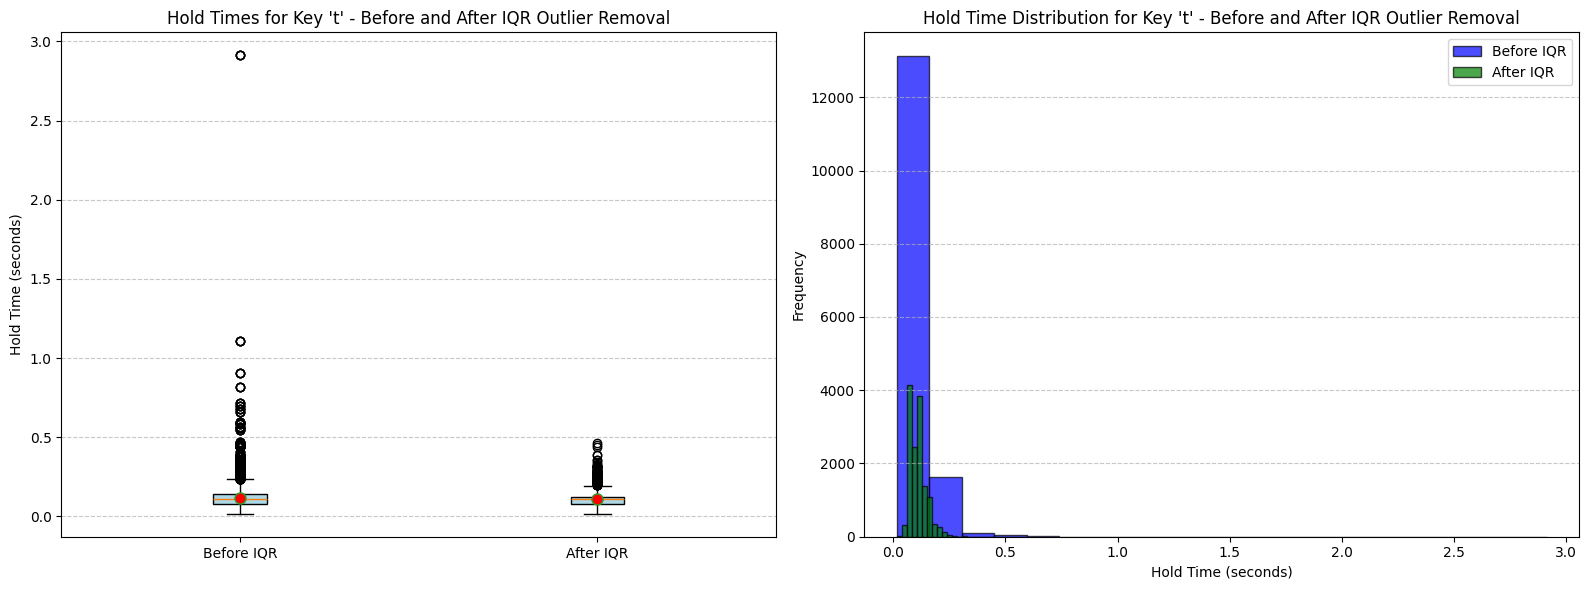

/var/folders/pg/gw2rszz96l3c75cftt4ppm_00000gn/T/ipykernel_7387/3282890543.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(


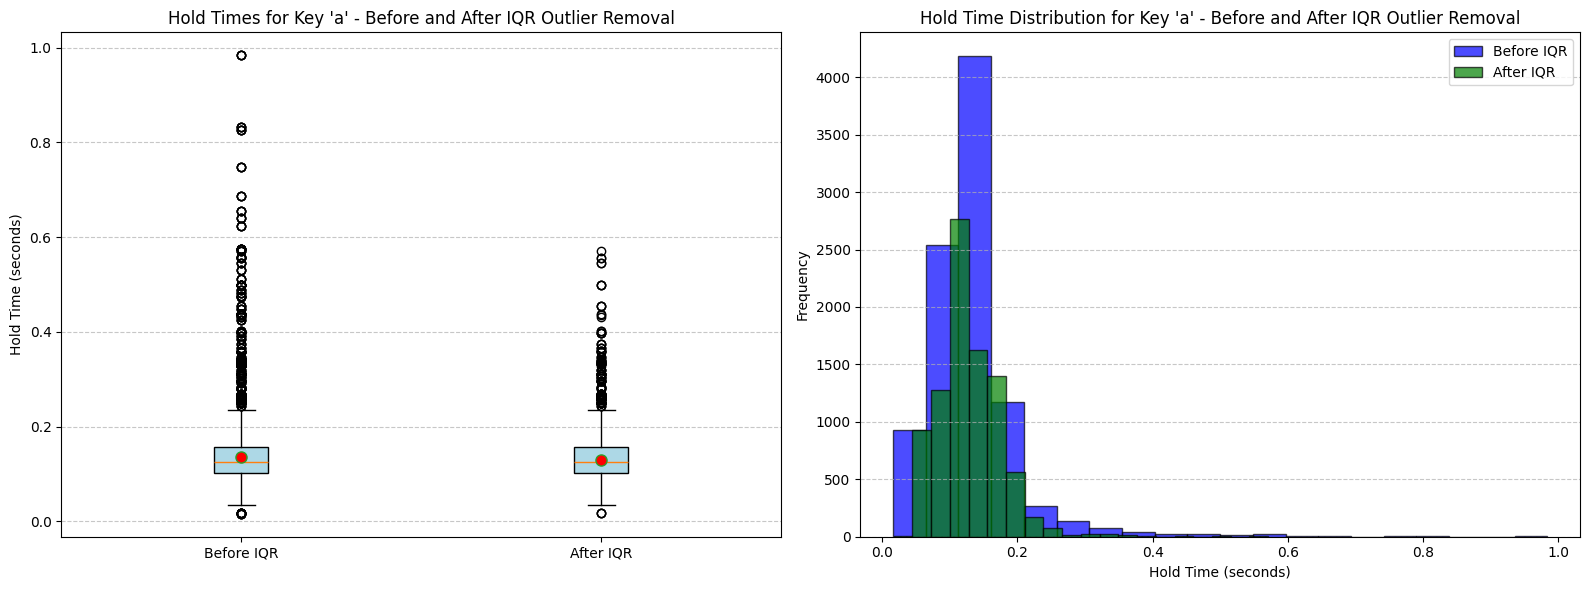

/var/folders/pg/gw2rszz96l3c75cftt4ppm_00000gn/T/ipykernel_7387/3282890543.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(


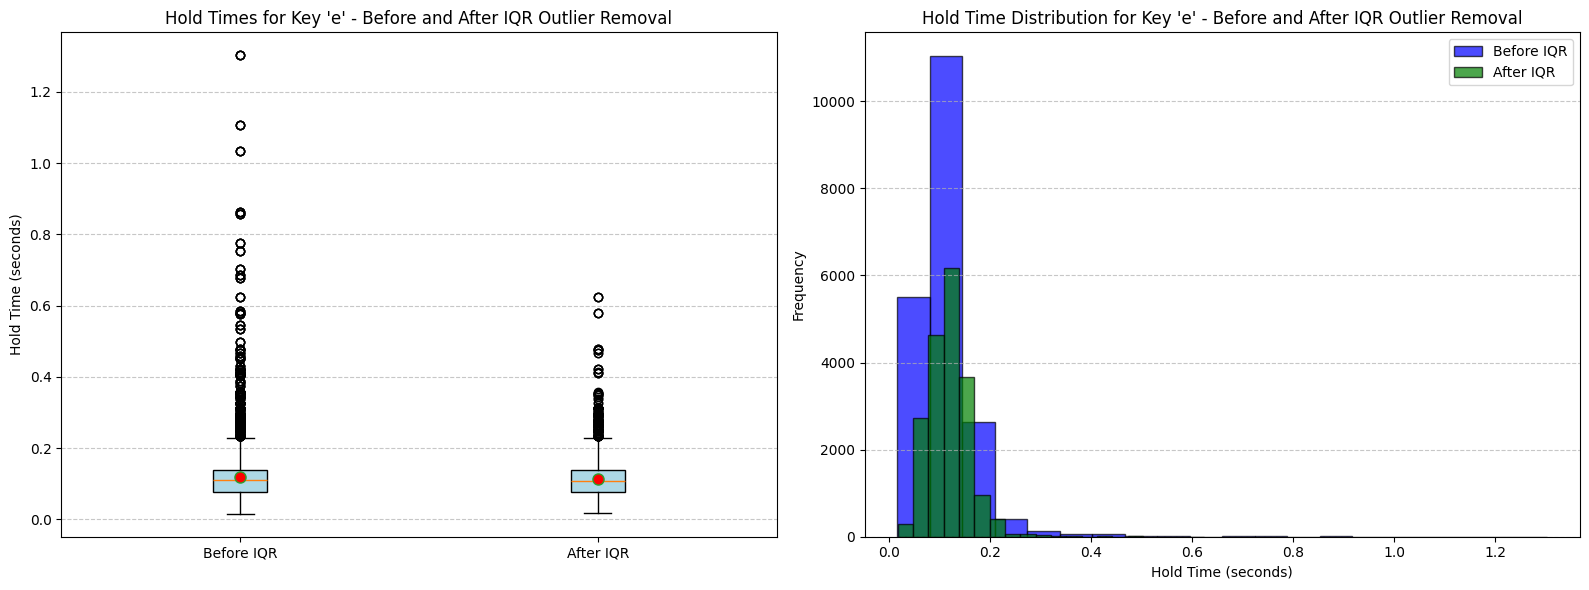

/var/folders/pg/gw2rszz96l3c75cftt4ppm_00000gn/T/ipykernel_7387/3282890543.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(


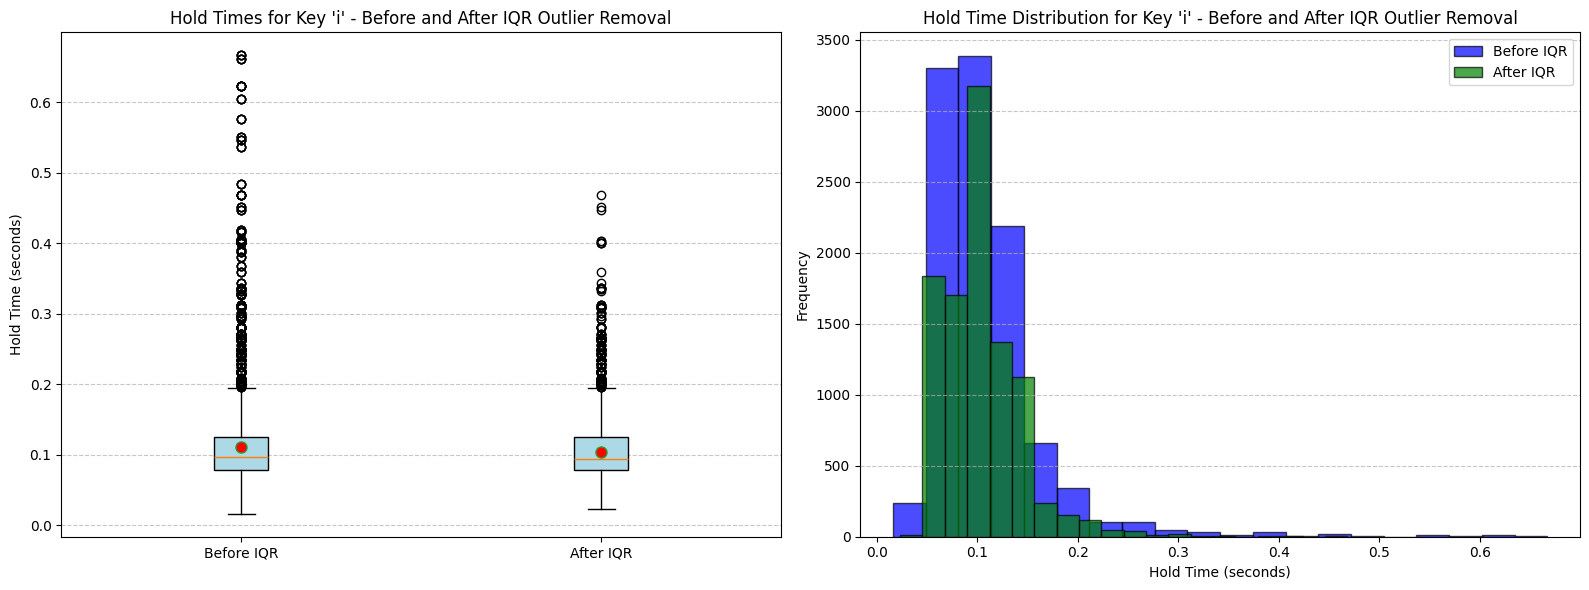

/var/folders/pg/gw2rszz96l3c75cftt4ppm_00000gn/T/ipykernel_7387/3282890543.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(


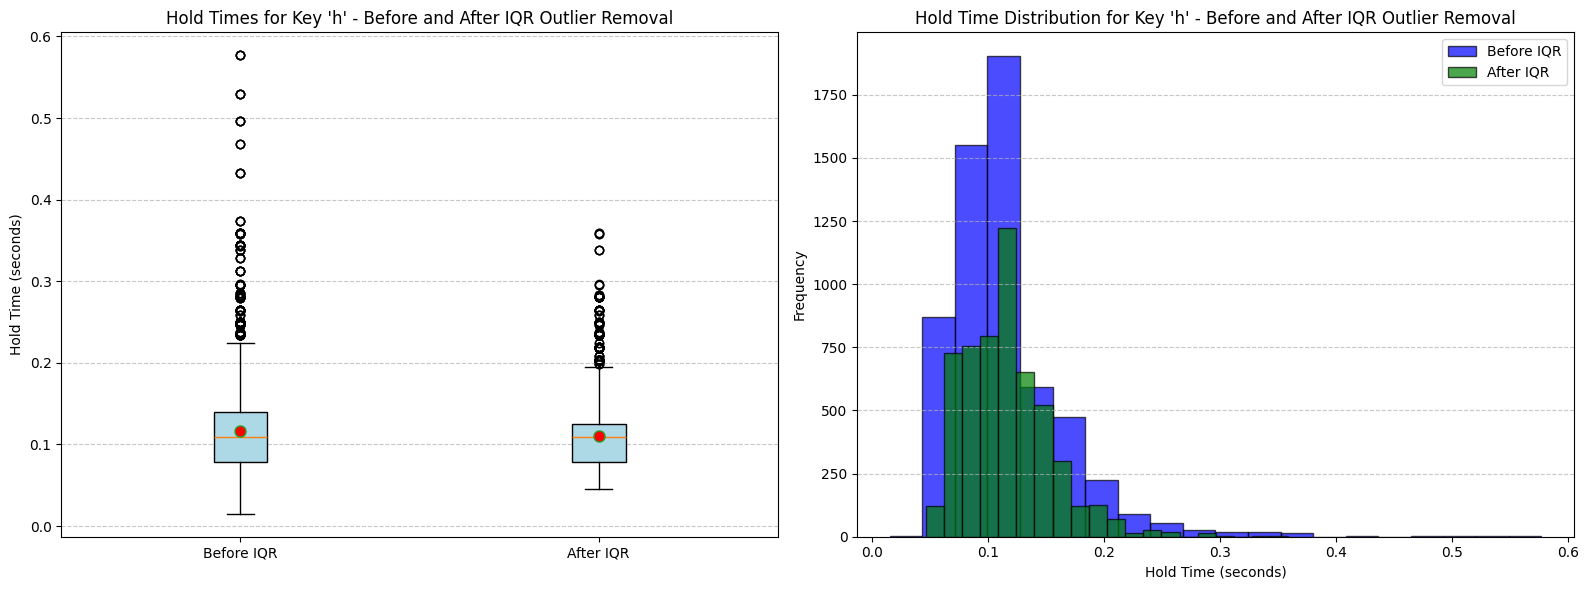

In [36]:
import matplotlib.pyplot as plt

# Visualize hold times before and after outlier removal
for key in keys_of_interest:
    # Collect data for all samples before and after outlier removal
    hold_times_before = []
    hold_times_after = []

    for sample in samples:
        # Calculate hold times for the sample
        hold_times = calculate_hold_times(sample)
        hold_times_before.extend(hold_times[key])

    for cleaned_hold_times in processed_samples:
        hold_times_after.extend(cleaned_hold_times[key])

    # Convert to NumPy arrays for visualization
    hold_times_before = np.array(hold_times_before)
    hold_times_after = np.array(hold_times_after)

    # Create a figure with two subplots (side by side)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Box plot
    axes[0].boxplot(
        [hold_times_before, hold_times_after], 
        labels=['Before IQR', 'After IQR'], 
        showmeans=True,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue'),
        meanprops=dict(marker='o', markerfacecolor='red', markersize=8),
    )
    axes[0].set_title(f"Hold Times for Key '{key}' - Before and After IQR Outlier Removal")
    axes[0].set_ylabel("Hold Time (seconds)")
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Histogram
    axes[1].hist(hold_times_before, bins=20, alpha=0.7, label='Before IQR', color='blue', edgecolor='black')
    axes[1].hist(hold_times_after, bins=20, alpha=0.7, label='After IQR', color='green', edgecolor='black')
    axes[1].set_title(f"Hold Time Distribution for Key '{key}' - Before and After IQR Outlier Removal")
    axes[1].set_xlabel("Hold Time (seconds)")
    axes[1].set_ylabel("Frequency")
    axes[1].legend()
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

In [37]:
import numpy as np
import pandas as pd

# Initialize lists to store feature vectors and corresponding labels
feature_vectors = []
labels = []

# Keys of interest
keys_of_interest = ['t', 'a', 'e', 'i', 'h']

# Iterate over each processed sample and its corresponding label
for idx, cleaned_hold_times in enumerate(processed_samples):
    features = []
    for key in keys_of_interest:
        times = cleaned_hold_times.get(key, np.array([]))
        if len(times) > 0:
            # Calculate mean and standard deviation
            mean_time = np.mean(times)
            std_time = np.std(times)
        else:
            # Handle missing data by assigning zero
            mean_time = 0.0
            std_time = 0.0
        # Append the features for this key
        features.extend([mean_time, std_time])
    # Append the feature vector and label to the lists
    feature_vectors.append(features)
    labels.append(sample_labels[idx])

# Convert feature vectors and labels to NumPy arrays or pandas DataFrames
feature_vectors = np.array(feature_vectors)
labels = np.array(labels)

# Optionally, create a pandas DataFrame for better visualization
feature_names = []
for key in keys_of_interest:
    feature_names.extend([f'{key}_mean', f'{key}_std'])

features_df = pd.DataFrame(feature_vectors, columns=feature_names)
labels_series = pd.Series(labels, name='userID')


/Users/rashmi/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Class Distribution: {np.int64(0): np.int64(59), np.int64(1): np.int64(52), np.int64(2): np.int64(33), np.int64(3): np.int64(46), np.int64(4): np.int64(40), np.int64(5): np.int64(38), np.int64(6): np.int64(39), np.int64(7): np.int64(41), np.int64(8): np.int64(42), np.int64(9): np.int64(40)}

Fold 1
Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0509 - loss: 2.6229 - val_accuracy: 0.0764 - val_loss: 2.3672
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0618 - loss: 2.5602 - val_accuracy: 0.0903 - val_loss: 2.3471
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0644 - loss: 2.5235 - val_accuracy: 0.1181 - val_loss: 2.3273
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0950 - loss: 2.4351 - val_accuracy: 0.1319 - val_loss: 2.3076
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0959 - loss: 2.3989 - val_accuracy: 0.1736 - val_loss: 2.2879
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1168 - loss:

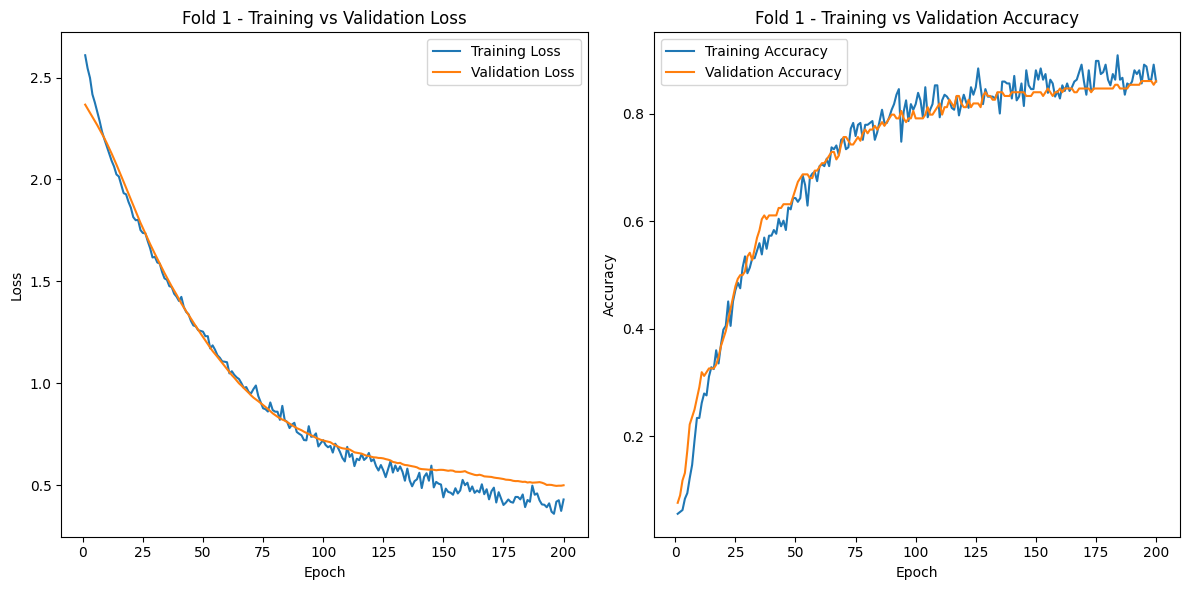


Fold 2
Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1564 - loss: 2.6921 - val_accuracy: 0.1748 - val_loss: 2.4807
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1676 - loss: 2.5350 - val_accuracy: 0.1888 - val_loss: 2.4373
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1738 - loss: 2.4600 - val_accuracy: 0.1958 - val_loss: 2.3991
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1640 - loss: 2.4881 - val_accuracy: 0.2098 - val_loss: 2.3615
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1977 - loss: 2.4221 - val_accuracy: 0.2028 - val_loss: 2.3269
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1770 - loss: 2.3650 - val_accuracy: 0.2098 - val_loss: 2.2965
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2374 - loss: 2.2351 - val_accuracy: 0.2378 - val_loss: 2.2677
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2338 - loss: 2.3098 - val_accuracy: 0.2657 - val_loss

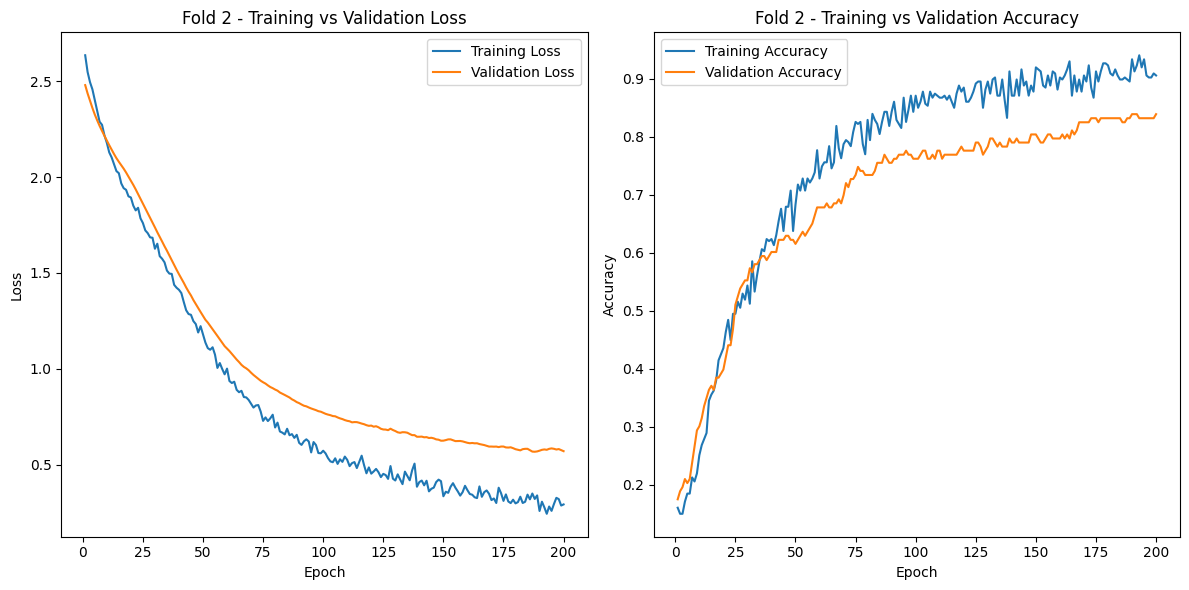


Fold 3
Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1353 - loss: 2.8590 - val_accuracy: 0.0769 - val_loss: 2.6810
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1500 - loss: 2.7269 - val_accuracy: 0.0769 - val_loss: 2.6274
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1599 - loss: 2.6497 - val_accuracy: 0.1119 - val_loss: 2.5758
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1738 - loss: 2.5909 - val_accuracy: 0.1608 - val_loss: 2.5258
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1810 - loss: 2.4764 - val_accuracy: 0.1748 - val_loss: 2.4782
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2059 - loss: 2.4477 - val_accuracy: 0.1958 - val_loss: 2.4319
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2112 - loss: 2.4117 - val_accuracy: 0.2168 - val_loss: 2.3892
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1911 - loss: 2.4051 - val_accuracy: 0.2168 - val_loss

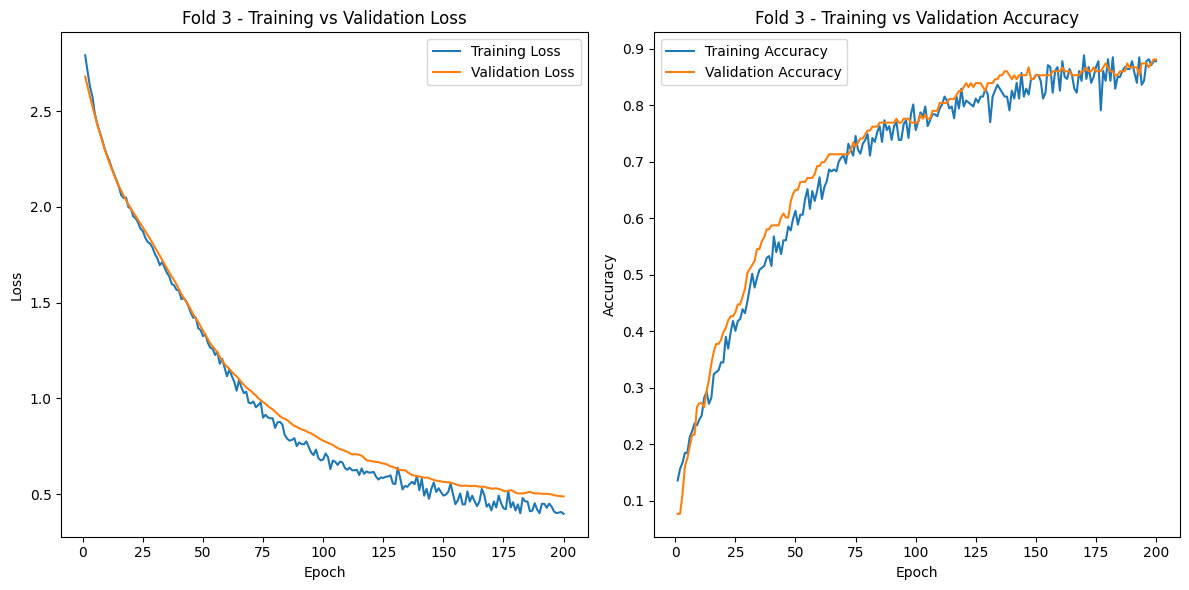


Average Validation Accuracy over 3 folds: 85.81%


In [38]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import tensorflow as tf

# Step 1: Data Preparation

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_vectors)

# Encoding labels (user IDs) to integers using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Check class distribution for imbalance
unique, counts = np.unique(y_encoded, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)

# Convert integer labels to one-hot encoded vectors
y_one_hot = to_categorical(y_encoded, num_classes=10)

# Step 2: Initialize Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize lists to store test accuracies and histories for each fold
test_accuracies = []
all_histories = []

fold_no = 1
for train_index, val_index in skf.split(X_scaled, y_encoded):
    print(f"\nFold {fold_no}")
    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_scaled[train_index], X_scaled[val_index]
    y_train_fold, y_val_fold = y_one_hot[train_index], y_one_hot[val_index]

    # Step 3: Building the Model
    model = Sequential()
    # First hidden layer with Batch Normalization and L2 Regularization
    model.add(Dense(10, input_dim=X_scaled.shape[1], kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    # Second hidden layer with Batch Normalization and L2 Regularization
    model.add(Dense(10, kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Step 4: Compiling the Model
    optimizer = Adam(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Step 5: Define EarlyStopping Callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        verbose=1
    )

    # Step 6: Training the Model with Early Stopping
    history = model.fit(
        X_train_fold,
        y_train_fold,
        epochs=200,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping],
        verbose=1
    )

    # Save the history
    all_histories.append(history)

    # Step 7: Evaluating the Model
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Validation Accuracy for Fold {fold_no}: {accuracy * 100:.2f}%")

    # Append the accuracy to the list
    test_accuracies.append(accuracy)

    # Plot training & validation accuracy and loss values
    epochs_range = range(1, len(history.history['accuracy']) + 1)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['loss'], label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold_no} - Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} - Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    fold_no += 1

# Step 8: Reporting Results
# Calculate the average accuracy across all folds
average_accuracy = np.mean(test_accuracies)
print(f'\nAverage Validation Accuracy over {skf.get_n_splits()} folds: {average_accuracy * 100:.2f}%')


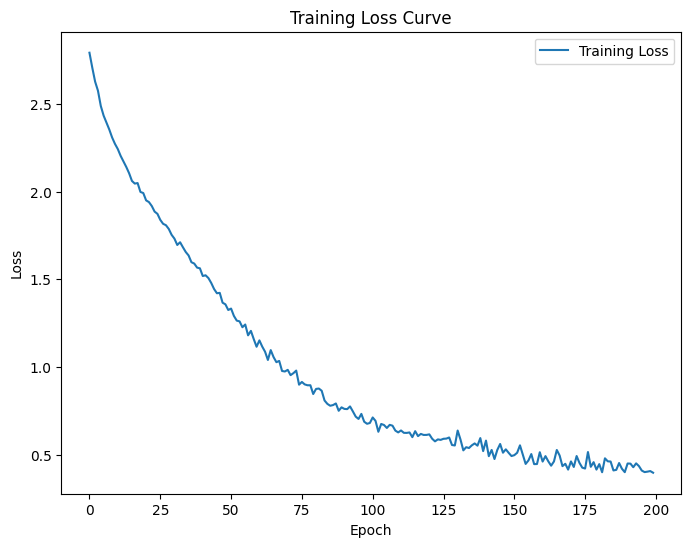

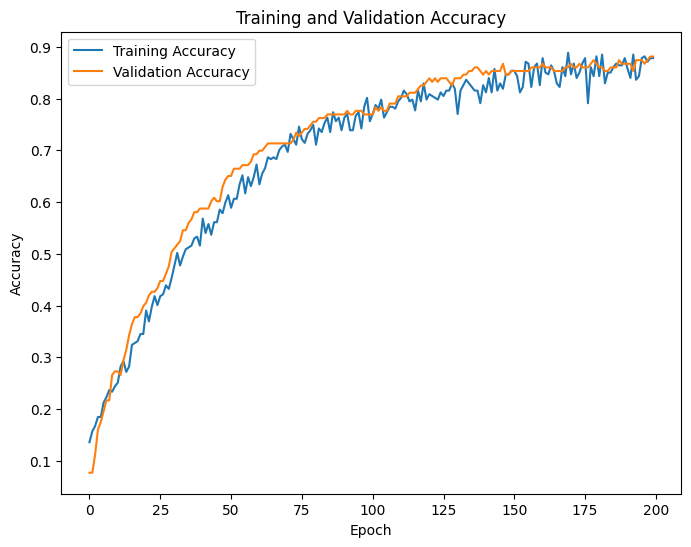

In [39]:
import matplotlib.pyplot as plt

# Plot the training loss curve w.r.t epoch
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy w.r.t epoch
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
